<a href="https://colab.research.google.com/github/rdkdaniel/Computer-Vision/blob/main/DL_4_Image_Classificaton_CNN_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Without errors. WE HOPE 😄***

*Well ordered work!*

# **0.1 The Data**

In [ ]:
#Connecting colab with kaggle to get the data
#Install the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:49<00:00, 63.0MB/s]
100% 2.29G/2.29G [00:49<00:00, 49.3MB/s]


## **0.1.1 Unzipping the Dataset**

In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# **1.0 The Model**

In [ ]:
# Importing all necessary libraries/dependencies
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
  
img_width, img_height = 224, 224 #images should be of size 224*224

## **1.0.1 Loading the Data**

In [ ]:
train_data_dir = '/content/chest_xray/train'
validation_data_dir = '/content/chest_xray/test'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [ ]:
#Image format
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

## **1.0.2 Building the Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## **1.0.3 Compiling the Model**

In [ ]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])

# **1.4 Running the Model**

In [ ]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

model.fit_generator(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
25/25 [==============================] - 28s 1s/step - loss: 0.7873 - accuracy: 0.7375 - val_loss: 0.6526 - val_accuracy: 0.6562
Epoch 2/10
25/25 [==============================] - 30s 1s/step - loss: 0.5516 - accuracy: 0.7700 - val_loss: 0.7047 - val_accuracy: 0.5833
Epoch 3/10
25/25 [==============================] - 27s 1s/step - loss: 0.4493 - accuracy: 0.7475 - val_loss: 0.8894 - val_accuracy: 0.5938
Epoch 4/10
25/25 [==============================] - 28s 1s/step - loss: 0.4001 - accuracy: 0.8000 - val_loss: 0.4964 - val_accuracy: 0.8021
Epoch 5/10
25/25 [==============================] - 29s 1s/step - loss: 0.3702 - accuracy: 0.8125 - val_loss: 0.7412 - val_accuracy: 0.7292
Epoch 6/10
25/25 [==============================] - 27s 1s/step - loss: 0.3455 - accuracy: 0.8400 - val_loss: 0.7351 - val_accuracy: 0.6875
Epoch 7/10
25/25 [==============================] - 27s 1s/step - loss: 0.4115 - accuracy: 0.8200 - val_loss: 0.6716 - val_accuracy: 0.6979
Epoch 8/10
25/25 [==

# **1.5 Save the Model**

In [ ]:
#model.save_weights('/gdrive/My Drive/model_saved.rdk')
#Let us try this, where we specify the exact location to save the model
model.save('/gdrive/My Drive/model_saved.rdk') 

# **1.6 Using the Model**

*We got an error below due to "load_img" library.*

*Install it? Done below.*

*Issue is the syntax, in some, a change from "fullstop" to "underscore" in the library install worked.*

In [ ]:
from keras_preprocessing.image import load_img

In [ ]:
from keras_preprocessing.image import img_to_array #Underscore instead of fullstop

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('/gdrive/My Drive/model_saved.rdk')

image = load_img('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size=(224, 224))
#This should be a normal classification
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Normal , 1- Pneumonia): ", label[0][0])

1/1 [==============================] - 0s 110ms/step
Predicted Class (0 - Normal , 1- Pneumonia):  0.3693281


*   Yes, it worked. we needed to specify the path where the model is saved after mounting the drive i.e. "model.save('/gdrive/My Drive/model_saved.rdk')". NOTE THE SPECIFIED PATH INSIDE THE BRACKETS.
*   Same also applied in loading the model - "model = load_model('/gdrive/My Drive/model_saved.rdk')"



*   *The error below. Found similar issues online. Problem is the default path used to store checkpoints is based on local drive settings.*
*   *Here we are working with colab, we must first mount the drive as that is where the checkpoints are saved.*


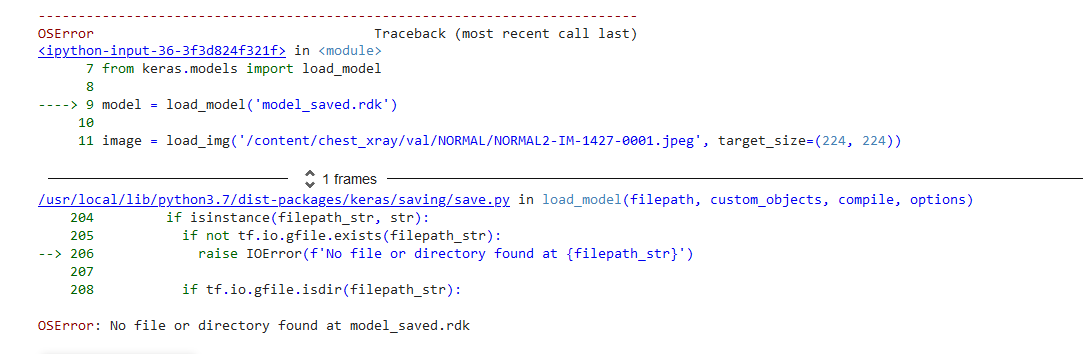

In [ ]:
#Mount drive
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#Hope this works

Mounted at /content/drive




*   After mounting, run "Using the Model" code 36 again.
*   Still, no success
*   Think, we will have to set the path of the checkpoint manually
*   Yess! after mounting the drive, we then specified the path as we saved the model. Thereafter, when calling the model, the path must also be specified.



https://stackoverflow.com/questions/51593527/oserror-unable-to-open-file-unable-to-open-file

# **1.6.1 More Use of the Model**

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('/gdrive/My Drive/model_saved.rdk')

image = load_img('/content/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg', target_size=(224, 224))
#This should be a pneumonia classification
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Normal , 1- Pneumonia): ", label[0][0])

1/1 [==============================] - 0s 115ms/step
Predicted Class (0 - Normal , 1- Pneumonia):  0.9354956


***Better performance - Close to 1 for pneumonia***

# **1.6.2 More Use of the Model**

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('/gdrive/My Drive/model_saved.rdk')

image = load_img('/content/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg', target_size=(224, 224))
#This should be a pneumonia classification
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Normal , 1- Pneumonia): ", label[0][0])

1/1 [==============================] - 0s 95ms/step
Predicted Class (0 - Normal , 1- Pneumonia):  0.98001426


***Better performance - Close to 1 for pneumonia***

# **1.6.3 More Use of the Model**

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('/gdrive/My Drive/model_saved.rdk')

image = load_img('/content/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg', target_size=(224, 224))
#This should be a normal classification
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Normal , 1- Pneumonia): ", label[0][0])

1/1 [==============================] - 0s 197ms/step
Predicted Class (0 - Normal , 1- Pneumonia):  0.42091528


***Hmm, results closer to zero***